# Fitting S+D model to control data

- Need to first run Cluster_Fit_SD_Ctrl.py, to obtain fits
- This notebook processed the fitted data and plots Supplementary Fig 4D-F

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

sys.path.append("../../simulator/")
sys.path.append("../../fitting/")

from tissue import *
import tissplot as tplt
import matplotlib.path as mplPath
import analysis
import datasets as ds 
import tiss_optimize as topt
import sim_model

Best fit: index                                                                             236
r                                                                                0.35
tau                                                                            1000.0
hilln                                                                            10.0
rho                                                                               1.0
L                                                                                  20
useTerm                                                                          True
tadiv                                                                             100
Ahigh                                                                             inf
maxseed                                                                             4
cost_sum_ksd_bas_tot                                                         0.382422
cost_sum_ksd_bas_tot:shed                   

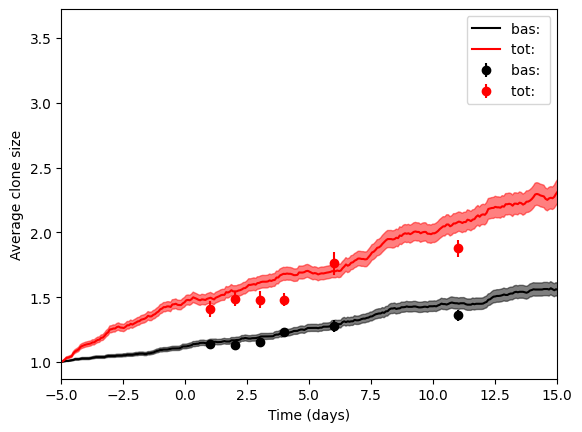

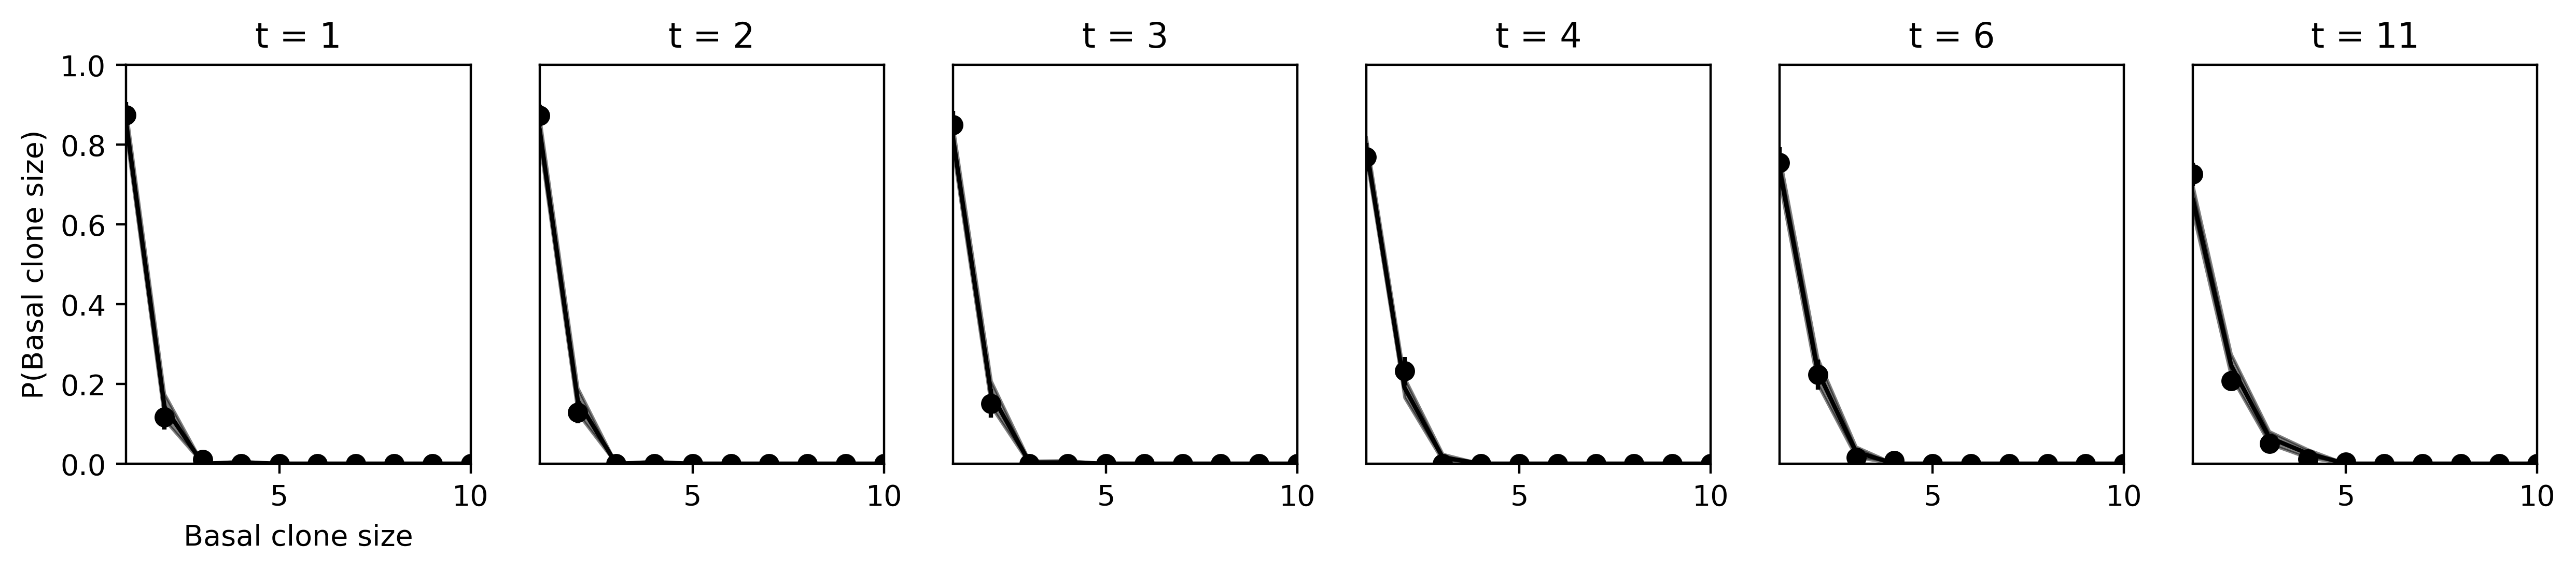

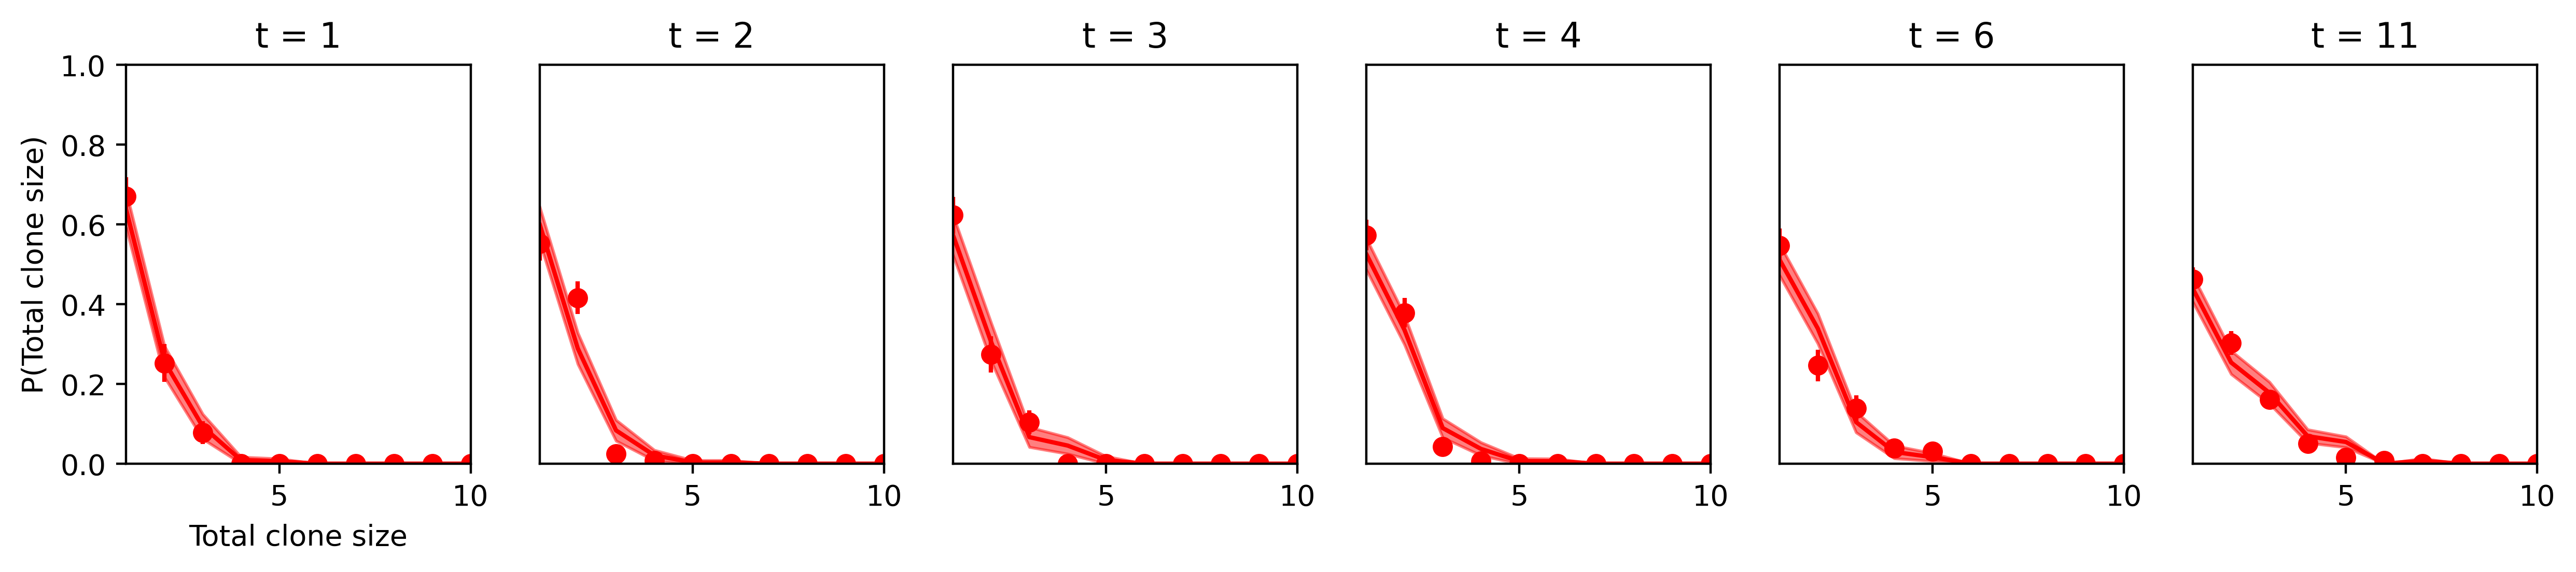

In [2]:
savefolder = 'ctr_SD_mech_switch/'
s0 = topt.optimizer(sim_model.SD_mech_switch, 
               {'r': np.arange(0.05, 0.55, 0.05), 
                  'tau': [1000.0],
                  'hilln': [0.25, 2.0, 10.0], 
                  'rho': np.arange(0.3, 1.01, 0.1)},
            params = {'L': 20, 'useTerm': True, 
                     'tadiv': 100, 'Ahigh': np.inf}, simtype = 'h',
         exp_file = '../../experiment/ablation.pkl',  exp_prefix = 'ctr', tshift = -5.0,
            metrics = [{'cost': 'cost_sum', 'dist_metric': 'ksd', 'dist': ['basalCS', 'totalCS']},
                     {'cost': 'cost_prd', 'dist_metric': 'ksd', 'dist': ['basalCS', 'totalCS']}],
            mergefirst = False)

s0.load_existing(7500, 400, 'ctr_SD_mech_switch/', tscalevals = -np.arange(2,10,0.2), 
                 shedvals = -np.arange(0.2, 3.1, 0.1))



sim_data = s0.get_best_fit('cost_prd_ksd_bas_tot', 7500, 400, savefolder = 'ctr_SD_mech_switch/', nseeds = 1, save_results = False)
exp_data = s0.exp_data

plt.figure()
ds.plot_quantity('basalCS', sim_data, exp_data, sim_data.tscalevals[0],
                 ylabel = 'Average clone size', plot_seeded = False, prelabel = 'bas: ')
ds.plot_quantity('totalCS', sim_data, exp_data, sim_data.tscalevals[0],
                 ylabel = 'Average clone size', plot_seeded = False, color = 'r', prelabel = 'tot: ')
plt.xlim([-5,15])


axs = ds.plot_dist('basalCS', sim_data, exp_data, subtimes= np.arange(0,6), maxbin = 10, cdf = False, xlabel= 'Basal clone size', prelabel= 'bas: ', bootSEs = True)
axs = ds.plot_dist('totalCS', sim_data, exp_data, subtimes= np.arange(0,6), maxbin = 10, cdf = False, xlabel= 'Total clone size', prelabel= 'tot: ', color = 'r', bootSEs = True)

In [3]:
print(s0.boot_stats('cost_prd_ksd_bas_tot').to_string(float_format=lambda x: f"{x:.3f}"))

                            Best   Mean Median   Std    Min    Max                                     95% CI                                      68% CI
cost_prd_ksd_bas_tot:shed -0.600 -0.750 -0.600 0.568 -3.000 -0.400  [-3.000000000000001, -0.4000000000000001]  [-0.8000000000000003, -0.5840000000000004]
tau                        7.000  7.206  7.200 1.421  3.200  9.800    [4.6000276001656015, 9.599692809830085]      [5.800127602807262, 9.000090000900009]
hilln                     10.000  8.332 10.000 3.575  0.250 10.000                               [0.25, 10.0]                                 [2.0, 10.0]
rho                        1.000  0.994  1.000 0.024  0.900  1.000                                 [0.9, 1.0]                                  [1.0, 1.0]
r                          0.350  0.351  0.350 0.080  0.100  0.500                 [0.17375000000000002, 0.5]                                 [0.25, 0.4]
τ/r                       20.000 21.051 20.000 4.436 16.572 43.999    [17.25

Using best shed for each parameter set
Min cost: -3.531947546992048


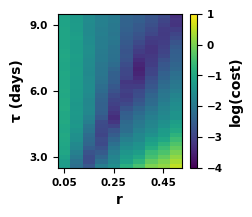

Using best tscale for each parameter set
Using best shed for each parameter set
Min cost: -3.531947546992048


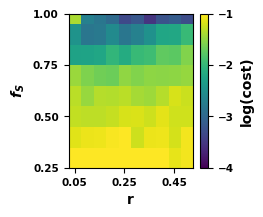

Using best tscale for each parameter set
Min cost: -3.531947546992048


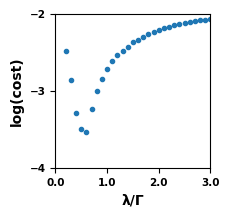

In [4]:
from matplotlib import rcParams

# Set global font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.weight'] = 'bold'

# Set global font size for all axes
rcParams['axes.labelsize'] = 10
rcParams['axes.labelweight'] = 'bold'
rcParams['xtick.labelsize'] = 7.5
rcParams['ytick.labelsize'] = 7.5
rcParams['legend.fontsize'] = 7.5
rcParams['font.size'] = 7.5  # General font size
rcParams['text.usetex'] = False
rcParams['svg.fonttype'] = 'none'
rcParams['lines.markersize']  = 3
rcParams['lines.linewidth']  = 1.5



plt.figure(figsize=(2.0,2.0))
best_fits = s0.best_fit('cost_prd_ksd_bas_tot')
s0.plot_sweeps(['r', 'tscale'], 'cost_prd_ksd_bas_tot', {'rho': best_fits['rho'], 
        'hilln': best_fits['hilln'], 'tau': best_fits['tau']}, 
               tsci = None, sbsi = None, good_thresh = 0.0, mark_best=False, 
               cbarlabel = 'log(cost)', cbarticks = None)
plt.xticks(np.round(np.arange(0.05,0.55,0.2),2))
plt.yticks(-np.arange(3,9.5,3), np.round(np.arange(3,9.5,3),2))
plt.ylim([-2.5,-9.5])
plt.clim(-4, 1)
plt.ylabel('τ (days)')
plt.savefig('SFig4C_r_tau.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

plt.figure(figsize=(2.0,2.0))
s0.plot_sweeps(['r', 'rho'], 'cost_prd_ksd_bas_tot', {
        'hilln': best_fits['hilln'], 'tau': best_fits['tau']}, 
               tsci = None, sbsi = None, good_thresh = 0.0, mark_best=False, 
               cbarlabel = 'log(cost)', cbarticks = [-4,-3,-2,-1])
plt.ylabel(r'$f_S$')
plt.xticks(np.round(np.arange(0.05,0.55,0.2),2))
plt.yticks(np.round(np.arange(0.25,1.01,0.25),2))
plt.ylim([0.25,1.0])
plt.clim(-4, -1)
plt.savefig('SFig4D_r_rho.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

plt.figure(figsize=(2.0,2.0))
s0.plot_sweeps(['shed'], 'cost_prd_ksd_bas_tot', {'rho': best_fits['rho'], 
        'hilln': best_fits['hilln'], 'tau': best_fits['tau'], 'r': best_fits['r']}, 
               tsci = None, sbsi = None, good_thresh = 0.0, mark_best=False)
plt.ylim([-4,-2])
plt.xlim([0,3])
plt.xticks(np.arange(0,3.1,1), np.arange(0,3.1,1))
plt.yticks([-4,-3,-2])
plt.xlabel('λ/Γ')
plt.ylabel('log(cost)')
plt.savefig('SFig4E_shed.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()